# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.

2. How well those variables describe the bike demands

### Goal:
1. Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.

2. It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Let us import Numpy and Pandas to read the data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bikesharing = pd.read_csv("day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing.shape

(730, 16)

In [4]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## There are no null values in the entire data set. There are 730 rows and 16 columns in the dataset

bikesharing.describe()

## Cleaning the Data

1. `Instant` is an index as row identifier
2. `dteday` is having date, this data we can get from separate columns 'year' and ''month'
3. `casual & registered` both these columns together provide the total count of the bikes booked by different categories of customers. Since our objective is to find the total count of bikes, not by specific category

### Above mentioned columns can be removed as we can validate the data without above data


In [5]:
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike_new = bikesharing[['season', 'yr', 'mnth', 'holiday', 'weekday',
                      'workingday', 'weathersit', 'temp', 'atemp', 'hum',
                      'windspeed', 'cnt']]
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
bike_new.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


1. we can see that features like `season`, `mnth`, `weekday` and `weathersit` are integers although they should be non-numerical categories.

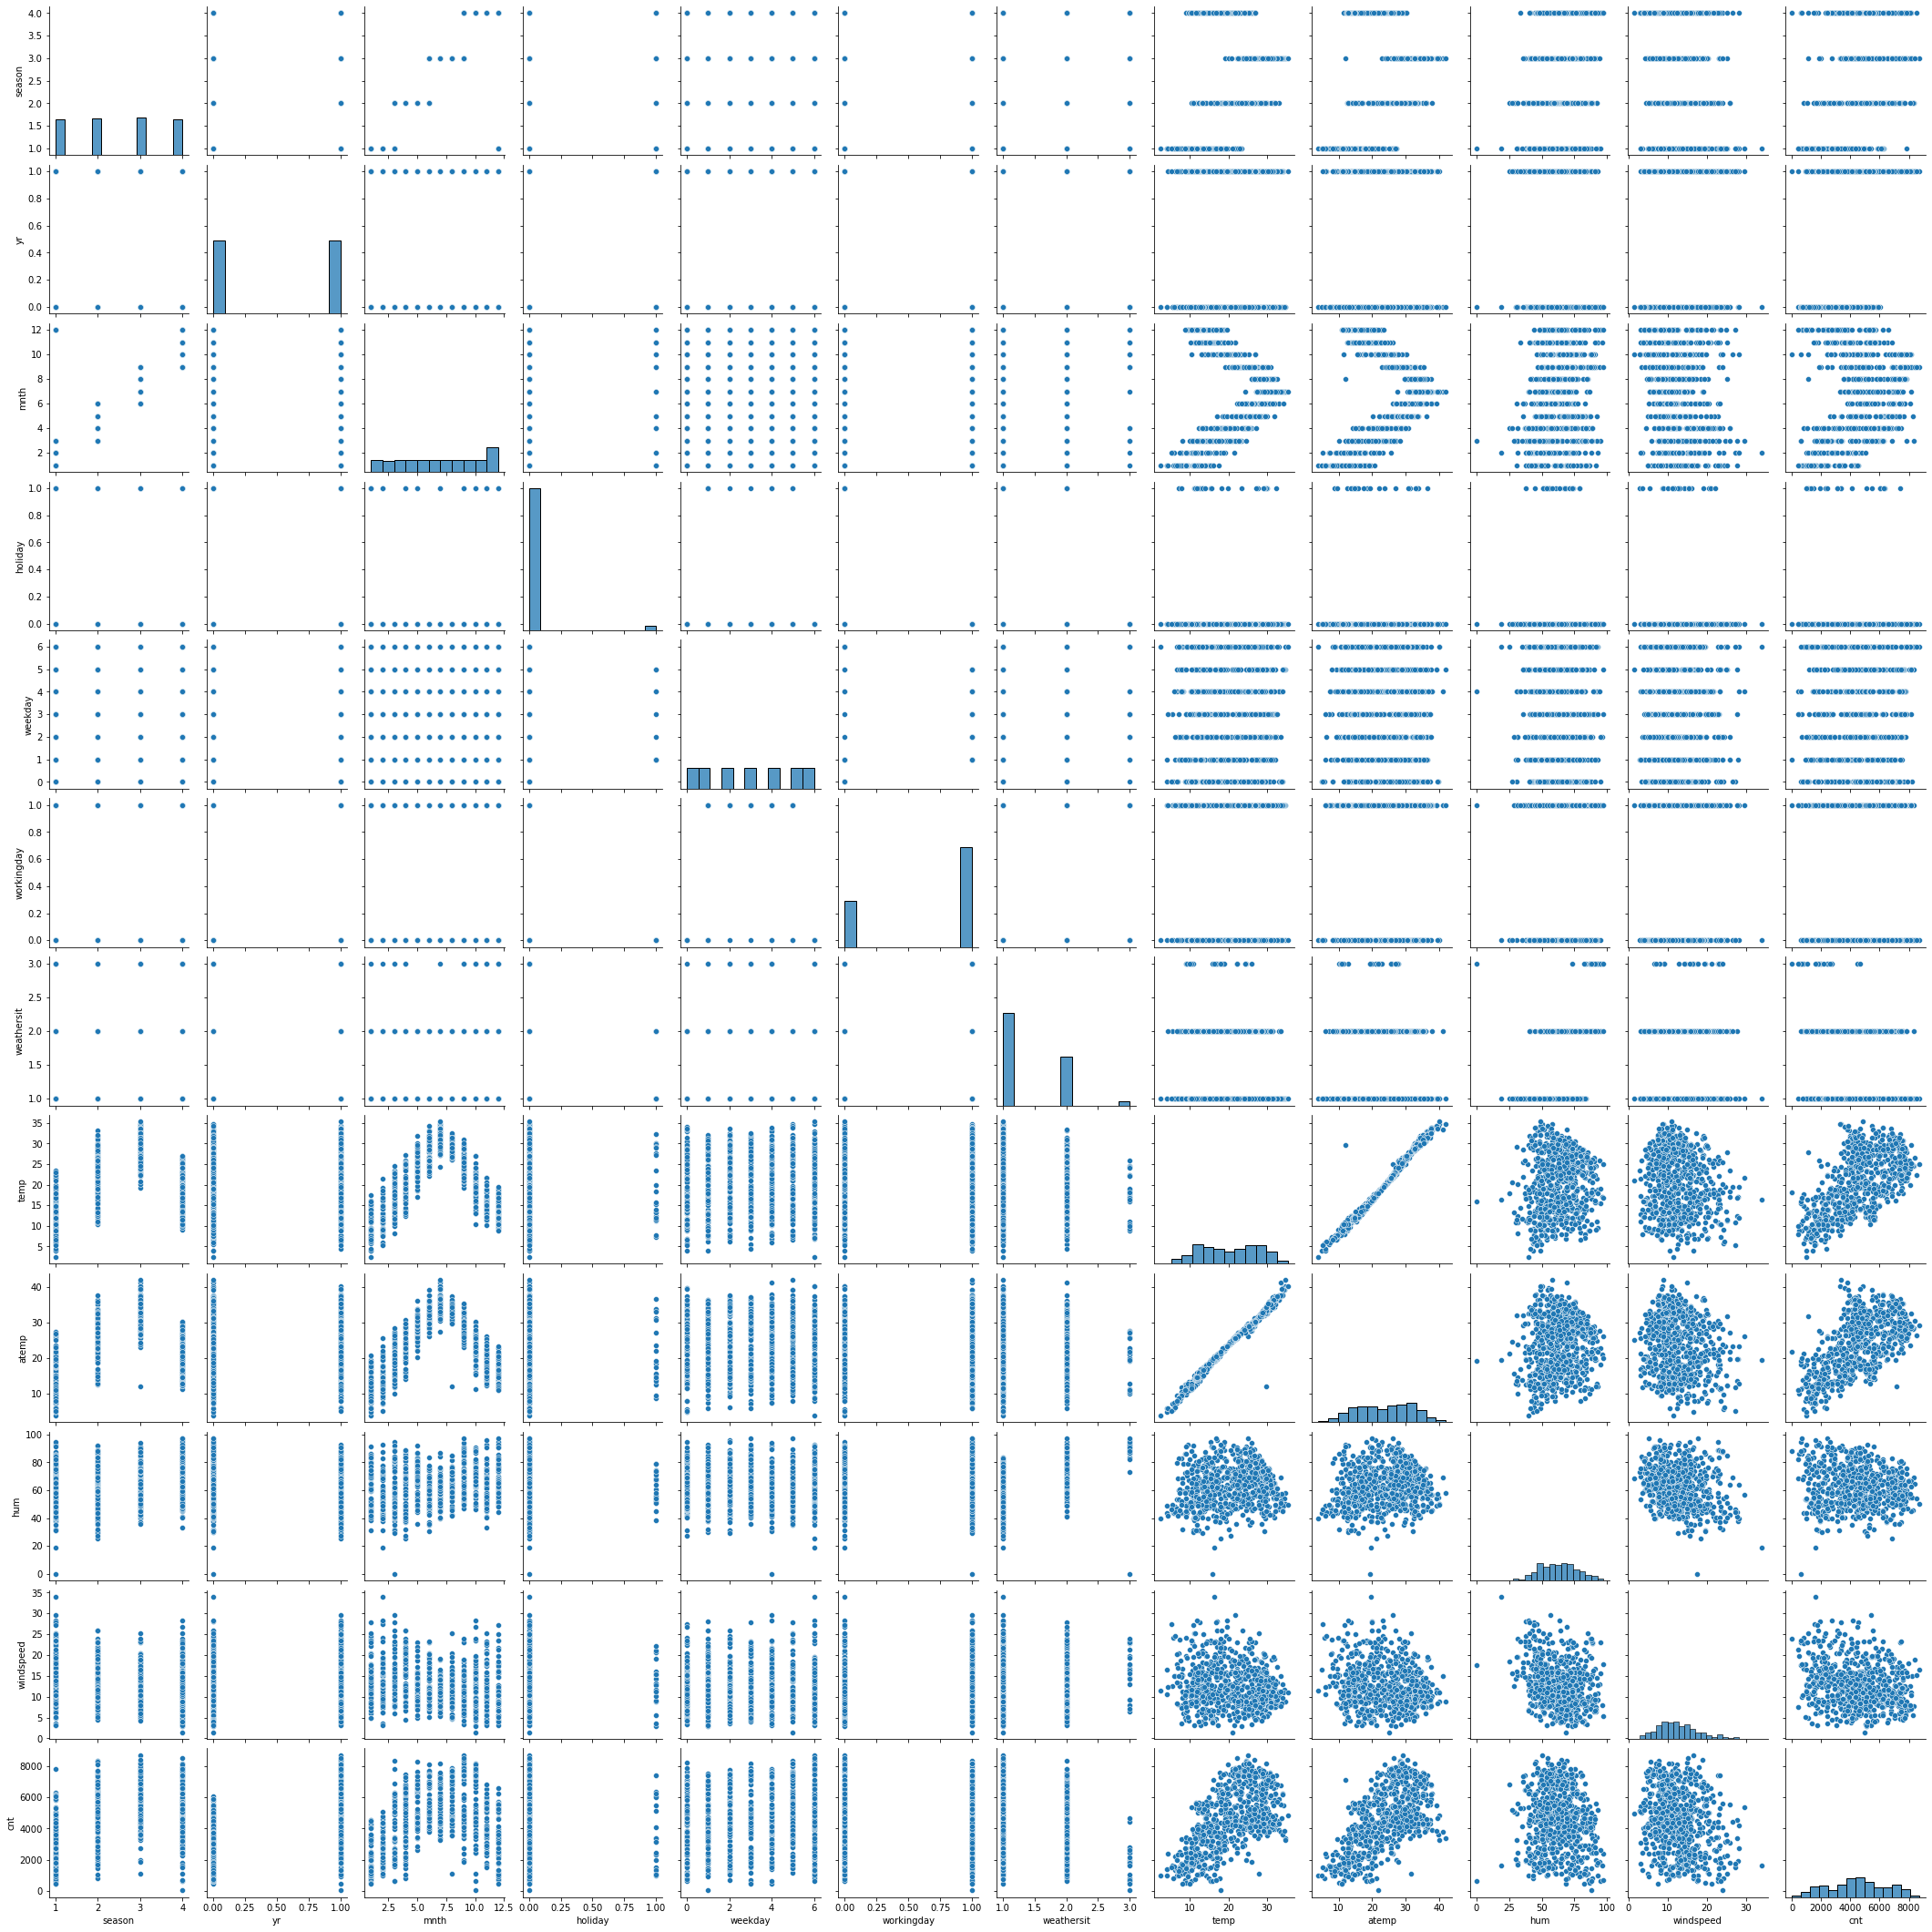

In [8]:
sns.pairplot(bike_new)
plt.show()

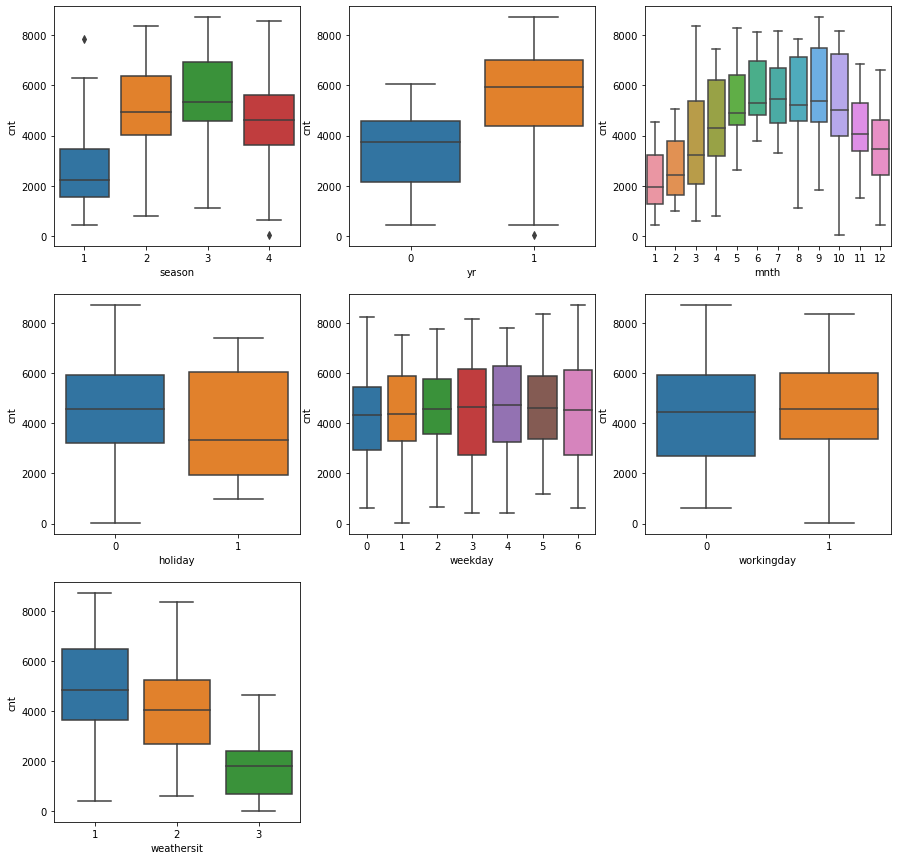

In [9]:
# visualizing the categorical variables
#plt.figure(figsize = (15, 8))
#plt.subplot(2,3,1)
#sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
#plt.subplot(2,3,2)
#sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
#plt.subplot(2,3,3)
#sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
#plt.subplot(2,3,4)
#sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
#plt.subplot(2,3,5)
#sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
#plt.subplot(2,3,6)
#sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
#plt.subplot(2,3,7)
#sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
#plt.show()

vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_new, x=i[1], y='cnt')
plt.show()

`Inference:`
Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

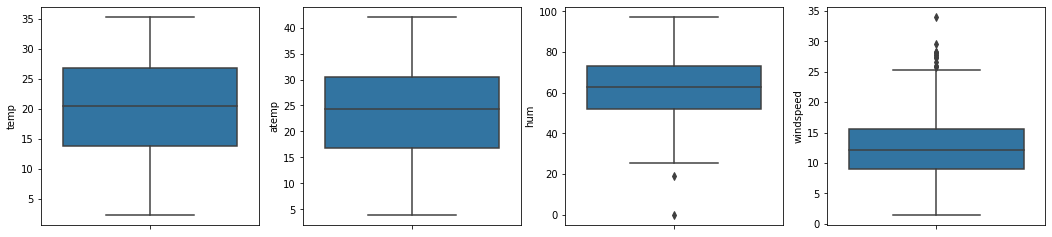

In [10]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_new)
    i+=1

**From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set**

## Convert season, month, weekday and weathersit to categorical types

In [11]:
bike_new.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_new.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_new.mnth = bike_new.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_new.weekday = bike_new.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_new.head()

C:\Users\Raghu\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Raghu\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1080x2160 with 0 Axes>

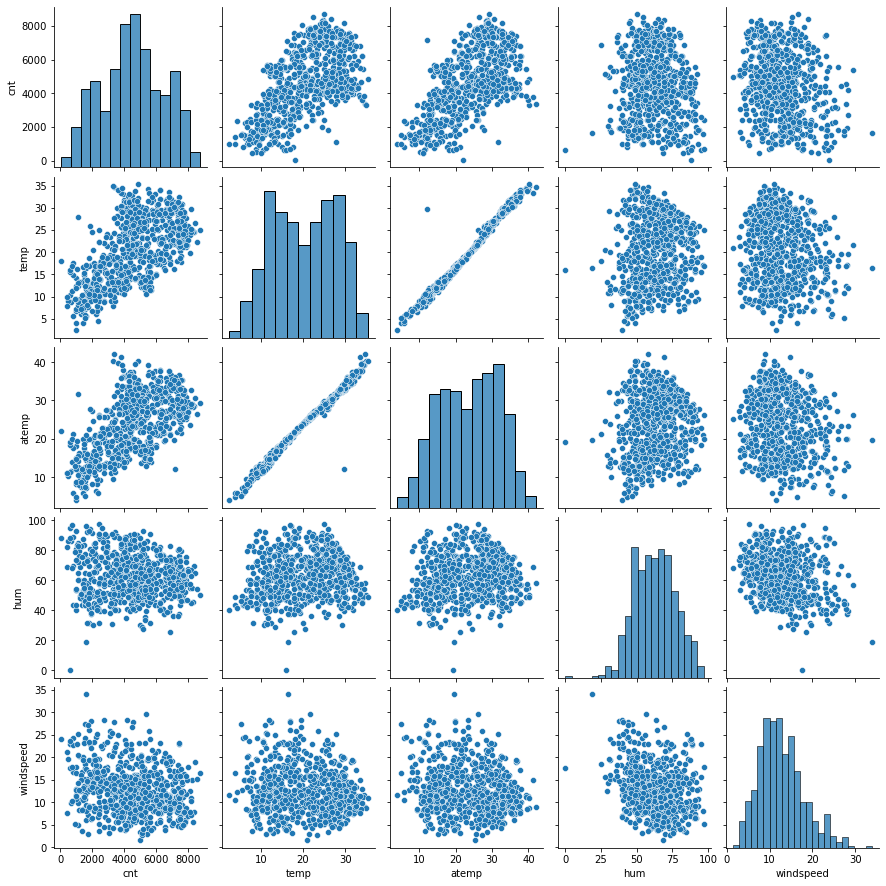

In [12]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_new,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<Figure size 1080x2160 with 0 Axes>

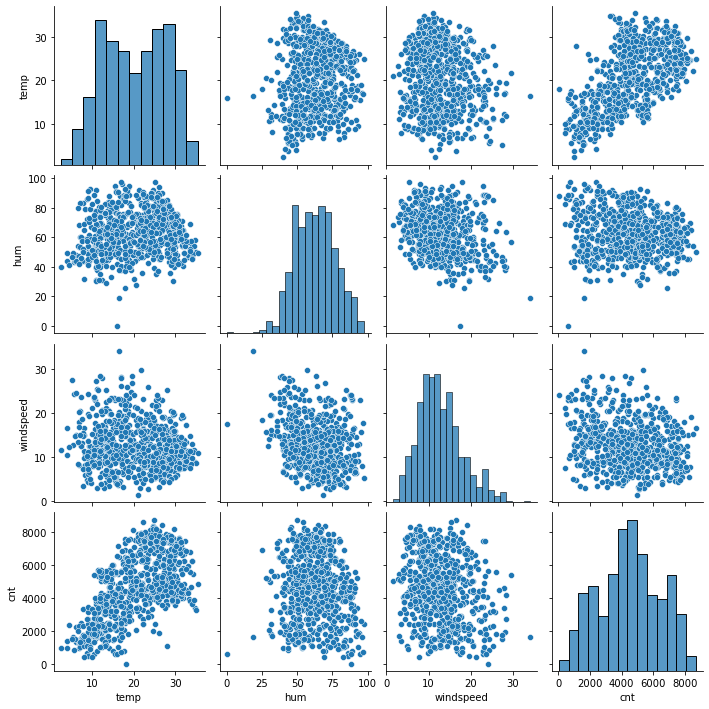

In [13]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_new,vars=['temp', 'hum','windspeed', 'cnt'])
plt.show()

`Inference:`
1. Looks like the temp and atemp has the highest corelation with the target variable cnt
2. temp and atemp are highly co-related with each other

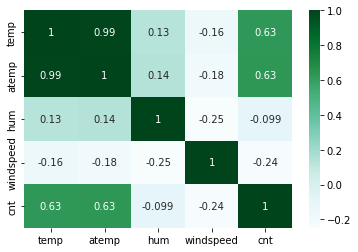

In [14]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_new[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

## Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

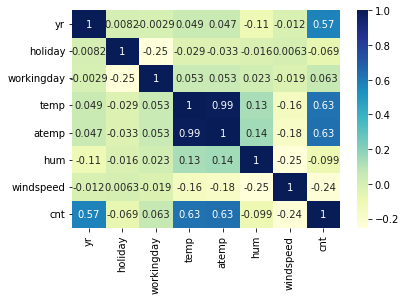

In [15]:
#Correlations for numeric variables
cor=bike_new.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

## Create dummy variables for all categorical variables

In [16]:
bike_new = pd.get_dummies(data=bike_new,columns=["season","mnth","weekday"],drop_first=True)
bike_new = pd.get_dummies(data=bike_new,columns=["weathersit"])

1. Dropping the first columns as (p-1) dummies can explain p categories.
2. In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [17]:
bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [18]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


## Model Building

In [19]:
# checking the shape before split
bike_new.shape

(730, 31)

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split

In [20]:
from sklearn.model_selection import train_test_split
#y to contain only target variable
#y=bike_new.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_new

#Train Test split with 70:30 ratio
np.random.seed(0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=100)
X_train, X_test = train_test_split(X, train_size = 0.7, test_size=0.3, random_state=100)

In [21]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [22]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(510, 31)
(219, 31)


In [23]:
y_train = X_train.pop('cnt')

## Rescaling the featurs of continuous variables

In [24]:
from sklearn.preprocessing import MinMaxScaler
#Instantiate the object
scaler = MinMaxScaler()

# Apply Scaler for  continuous variables
num_vars = ['temp','atemp','hum','windspeed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

C:\Users\Raghu\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.243137,0.245098,0.24902,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.429398,0.430568,0.43287,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Function to build a model using statsmodel api

In [27]:
import statsmodels.api as sm
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_lm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_lm).fit()
    #print(lr.summary())
    print(lr.params)
    return lr

## Function to calculate VIFs and print them

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [29]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

const                  2204.055565
yr                     2003.523954
holiday                -508.738143
workingday              378.282229
temp                   4431.497260
hum                   -1344.793395
windspeed             -1616.328935
season_spring          -441.603675
season_summer           431.642393
season_winter           820.750690
mnth_jan               -298.358515
mnth_jul               -462.354207
mnth_sept               705.666332
weekday_sat             466.944503
weathersit_bad        -2162.372804
weathersit_moderate    -502.606439
dtype: float64
               Features    VIF
4                   hum  29.40
3                  temp  17.77
2            workingday   5.31
5             windspeed   4.73
6         season_spring   4.53
8         season_winter   3.48
7         season_summer   2.84
14  weathersit_moderate   2.29
0                    yr   2.09
12          weekday_sat   1.98
9              mnth_jan   1.67
10             mnth_jul   1.59
11            mnth_sep

C:\Users\Raghu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


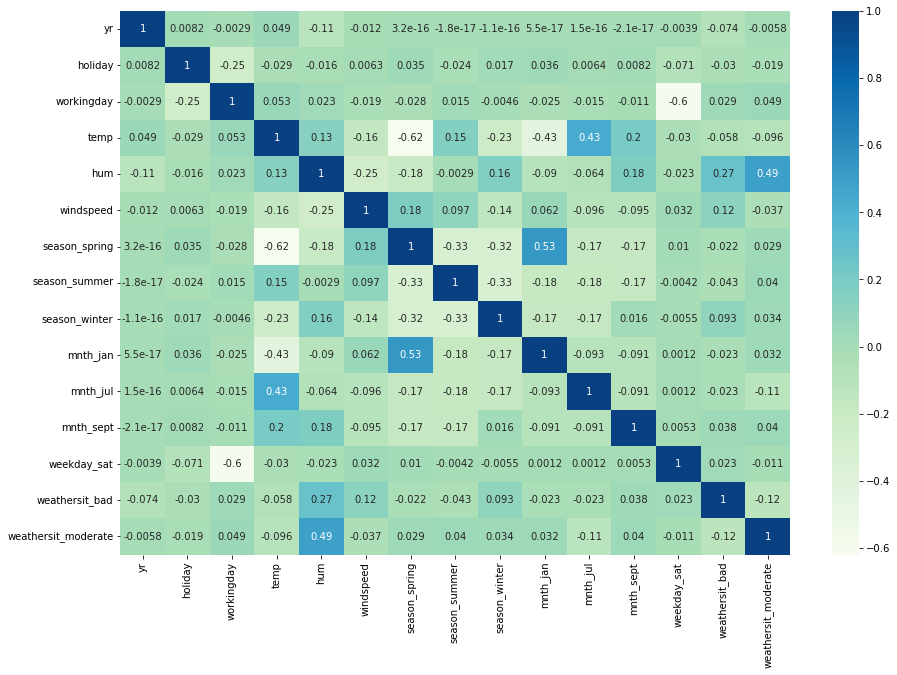

In [30]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike_new[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

In [31]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

const                  2102.683922
yr                     1996.883225
holiday                -516.600669
workingday              375.633537
temp                   4587.806168
hum                   -1386.090697
windspeed             -1569.780205
season_spring          -481.829184
season_summer           457.311174
season_winter           871.757222
mnth_jul               -477.024736
mnth_sept               710.767238
weekday_sat             462.440601
weathersit_bad        -2141.118463
weathersit_moderate    -502.809199
dtype: float64
               Features    VIF
4                   hum  28.49
3                  temp  16.97
2            workingday   5.28
5             windspeed   4.72
6         season_spring   4.24
8         season_winter   3.44
7         season_summer   2.83
13  weathersit_moderate   2.28
0                    yr   2.08
11          weekday_sat   1.97
9              mnth_jul   1.58
10            mnth_sept   1.39
12       weathersit_bad   1.24
1               holiday   

C:\Users\Raghu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Model 2

In [32]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

const                  2102.683922
yr                     1996.883225
holiday                -516.600669
workingday              375.633537
temp                   4587.806168
hum                   -1386.090697
windspeed             -1569.780205
season_spring          -481.829184
season_summer           457.311174
season_winter           871.757222
mnth_jul               -477.024736
mnth_sept               710.767238
weekday_sat             462.440601
weathersit_bad        -2141.118463
weathersit_moderate    -502.809199
dtype: float64
               Features    VIF
4                   hum  28.49
3                  temp  16.97
2            workingday   5.28
5             windspeed   4.72
6         season_spring   4.24
8         season_winter   3.44
7         season_summer   2.83
13  weathersit_moderate   2.28
0                    yr   2.08
11          weekday_sat   1.97
9              mnth_jul   1.58
10            mnth_sept   1.39
12       weathersit_bad   1.24
1               holiday   

C:\Users\Raghu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
# Dropping the variable hum as it has negative coefficient and having high VIF value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

const                  1392.452789
yr                     2030.675067
holiday                -496.726828
workingday              402.083053
temp                   4276.607918
windspeed             -1296.186132
season_spring          -567.483571
season_summer           404.145422
season_winter           746.379311
mnth_jul               -434.346670
mnth_sept               658.692701
weekday_sat             504.205983
weathersit_bad        -2524.539220
weathersit_moderate    -725.915091
dtype: float64
               Features   VIF
3                  temp  6.97
2            workingday  5.20
4             windspeed  4.65
5         season_spring  2.49
6         season_summer  2.32
0                    yr  2.07
7         season_winter  1.99
10          weekday_sat  1.96
8              mnth_jul  1.58
12  weathersit_moderate  1.56
9             mnth_sept  1.35
1               holiday  1.17
11       weathersit_bad  1.08


C:\Users\Raghu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

const                  1319.544720
yr                     2032.249862
workingday              475.759778
temp                   4280.545976
windspeed             -1303.782227
season_spring          -575.584393
season_summer           407.593028
season_winter           739.621485
mnth_jul               -425.163691
mnth_sept               641.826004
weekday_sat             578.690255
weathersit_bad        -2514.072968
weathersit_moderate    -721.418627
dtype: float64
               Features   VIF
2                  temp  6.73
1            workingday  4.65
3             windspeed  4.64
4         season_spring  2.38
5         season_summer  2.31
0                    yr  2.07
6         season_winter  1.92
9           weekday_sat  1.83
7              mnth_jul  1.58
11  weathersit_moderate  1.56
8             mnth_sept  1.34
10       weathersit_bad  1.08


C:\Users\Raghu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

const                  1243.556266
yr                     2036.726246
workingday              484.064009
temp                   4171.918338
windspeed             -1304.371665
season_spring          -478.956474
season_summer           534.895501
season_winter           844.634919
mnth_sept               757.723172
weekday_sat             581.421001
weathersit_bad        -2522.355356
weathersit_moderate    -710.364081
dtype: float64
               Features   VIF
2                  temp  5.48
1            workingday  4.65
3             windspeed  4.63
4         season_spring  2.30
0                    yr  2.07
5         season_summer  1.99
8           weekday_sat  1.83
6         season_winter  1.77
10  weathersit_moderate  1.56
7             mnth_sept  1.23
9        weathersit_bad  1.08


C:\Users\Raghu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
# Dropping the variable temp as it has negative coefficient and has high VIF Value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
lr = build_model(cols)
get_vif(cols)

const                  4630.492269
yr                     2150.930778
workingday              491.707120
windspeed             -1496.487214
season_spring         -2580.280608
season_summer          -360.977919
season_winter          -634.862477
mnth_sept               627.504151
weekday_sat             556.368370
weathersit_bad        -2617.753486
weathersit_moderate    -800.704018
dtype: float64
              Features   VIF
2            windspeed  3.99
1           workingday  3.29
3        season_spring  2.00
4        season_summer  1.99
0                   yr  1.88
5        season_winter  1.73
7          weekday_sat  1.56
9  weathersit_moderate  1.55
6            mnth_sept  1.18
8       weathersit_bad  1.08


C:\Users\Raghu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

`**Inference**`

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.768 Let us select above model  as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

# Model building using RFE 

In [37]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\Raghu\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 13),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('season_spring', False, 10),
 ('season_summer', False, 5),
 ('season_winter', False, 3),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 12),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 8),
 ('mnth_jul', False, 11),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 19),
 ('mnth_nov', False, 21),
 ('mnth_oct', False, 7),
 ('mnth_sept', False, 4),
 ('weekday_mon', False, 14),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 18),
 ('weekday_tue', False, 15),
 ('weekday_wed', False, 20),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [42]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [43]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1748.7452442646004 [ 2028.46403575  -984.29404228  -569.69796361   475.18005356
   527.04772244  -387.14518678 -2613.40239292  -690.90150628
  4093.03411676]


In [44]:
y_train_pred = lr.predict(X_train[cols])

In [45]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

C:\Users\Raghu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


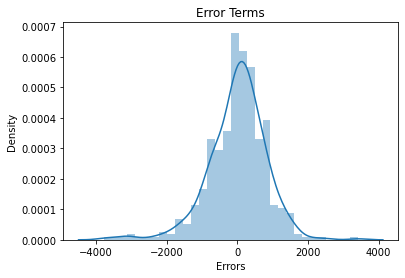

In [46]:
plot_res_dist(y_train, y_train_pred)

## Errors are normally distribured here with mean 0. So everything seems to be fine

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [47]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']
y_test = X_test.pop('cnt')

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

C:\Users\Raghu\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [48]:
# Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8109805303678386

**Inference**

R2 value for predictions on test data (0.810) is almost same as R2 value of train data(0.768).

Text(0, 0.5, 'y_test_pred')

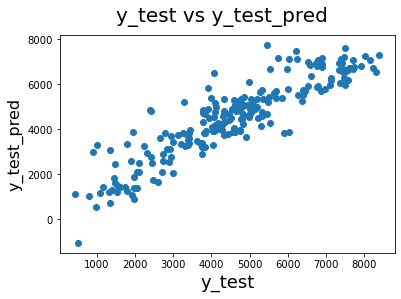

In [50]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

`**Inference**`

**Analysing the above model, the comapany should focus on the following features:**

1. Company should focus on expanding business during Spring.
2. Company should focus on expanding business during September.
3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
4. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.